In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

data = pd.read_csv(url)
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
### The goal is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [5]:
data.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
cols = ['ram', 'storage', 'screen', 'final_price']

In [8]:
df_col = data[cols]
df_col

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [9]:
for col in cols:
    print(col)
    print(df_col[col].unique()[:5])
    print(df_col[col].nunique())
    print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



### EDA

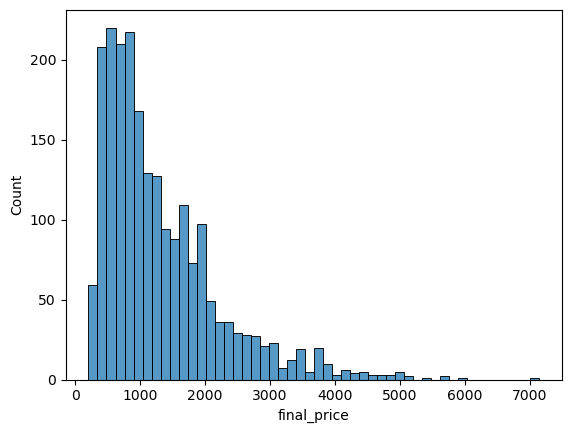

In [10]:
_ = sns.histplot(df_col.final_price, bins=50)

In [11]:
### - doest have tail

### Question 1

In [12]:
df_col.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

In [13]:
# What's the median (50% percentile) for variable `'ram'`?
df_col.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [14]:
df_col.ram.median()

16.0

### Prepare and split the dataset

In [15]:
n = len(df_col)

n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val


In [16]:
n,n_val + n_test + n_train

(2160, 2160)

In [17]:
# shuffle

idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [18]:
#seed

np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [19]:
df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train: n_train + n_val]]
df_test = df_col.iloc[idx[n_train+n_val:]]
len(df_col), len(df_train) + len(df_val) + len(df_test)

(2160, 2160)

In [20]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [21]:
df_val

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99
...,...,...,...,...
427,8,128,13.0,1049.00
428,8,256,13.3,799.00
429,8,512,14.0,565.54
430,16,512,14.0,738.00


In [22]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [23]:
y_val

0      2599.00
1       999.00
2       477.28
3      1519.00
4       402.99
        ...   
427    1049.00
428     799.00
429     565.54
430     738.00
431     452.00
Name: final_price, Length: 432, dtype: float64

In [24]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

In [25]:
# filling nan value with 0
df_train_0 = df_train.copy()

df_train_0.columns
df_train_0.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [26]:
df_train_0.fillna(0).isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [27]:
X_train = df_train_0.fillna(0).values

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:]

In [29]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [30]:
w0, w = train_linear_regression(X_train, y_train)

In [31]:
y_pred = w0 + X_train.dot(w)

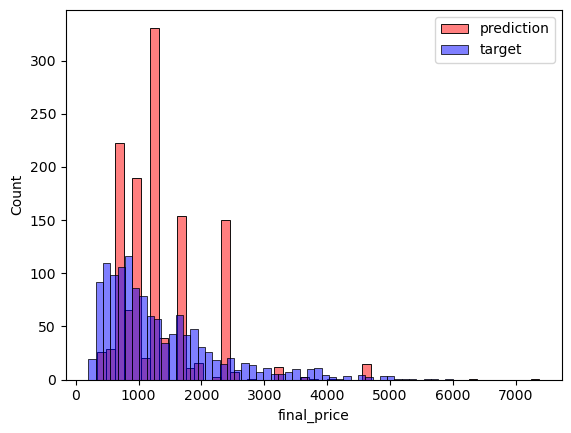

In [32]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50, label = 'prediction')
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50, label = 'target')
plt.legend()
plt.show()

In [33]:
score_0 = round(rmse(y_train, y_pred), 2)
score_0

602.39

In [34]:
# filling nan value with mean
df_train_mean = df_train.copy()

df_train_mean.columns
df_train_mean.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [35]:
df_train_mean['screen'] = df_train_mean['screen'].fillna(df_train_mean['screen'].mean())
df_train_mean.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [36]:
X_train_mean = df_train_mean.values

In [37]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [38]:
y_pred_mean = w0 + X_train_mean.dot(w)

In [39]:
score_mean = round(rmse(y_train, y_pred_mean), 2)
score_mean

602.18

### Question 4

In [40]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:]


In [41]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val =  df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score,2))

0 597.36
0.01 597.36
0.1 597.35
1 597.21
5 597.01
10 597.06
100 597.9


### Question 5 

In [42]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df_col.iloc[idx[:n_train]]
    df_val = df_col.iloc[idx[n_train: n_train + n_val]]
    df_test = df_col.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    y_train = df_train.final_price
    y_val = df_val.final_price
    y_test = df_test.final_price
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val =  df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)
    print(seed, round(score,2))

std_scores = np.std(scores)
print(f'The value of std: {round(std_scores, 3)}')

0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1
The value of std: 29.176


### Question 6

In [43]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [44]:
df_col = data[cols]
df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train: n_train + n_val]]
df_test = df_col.iloc[idx[n_train+n_val:]]

In [45]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [46]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [47]:
X_full_train = df_full_train.fillna(0).values

In [48]:
y_full_train = np.concatenate([y_train, y_val])

In [49]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [50]:
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049533